In [1]:
# check if packages can be loaded, i.e. they are already installed
library(FNN) # KNN regression
library(rgl) # 3D visualisation

2 K-Nearest Neighbour Regression

2.1 K-Nearest neighbours with one explanatory variable

In [2]:
x <- 1:20
y <- x + rnorm(length(x), mean = 10)
xgrid <- data.frame(x)


In [3]:
library(FNN)
knnr_out_1 <- knn.reg(x, y = y, k = 1, test = xgrid)
round(cbind(x, y, fitted_1 = knnr_out_1$pred), 2)
identical(y, knnr_out_1$pred)


x,y,fitted_1
1,11.48,11.48
2,13.14,13.14
3,13.70,13.70
4,11.72,11.72
5,13.73,13.73
6,14.54,14.54
7,18.14,18.14
8,16.19,16.19
9,19.53,19.53
10,20.30,20.30


[1] TRUE

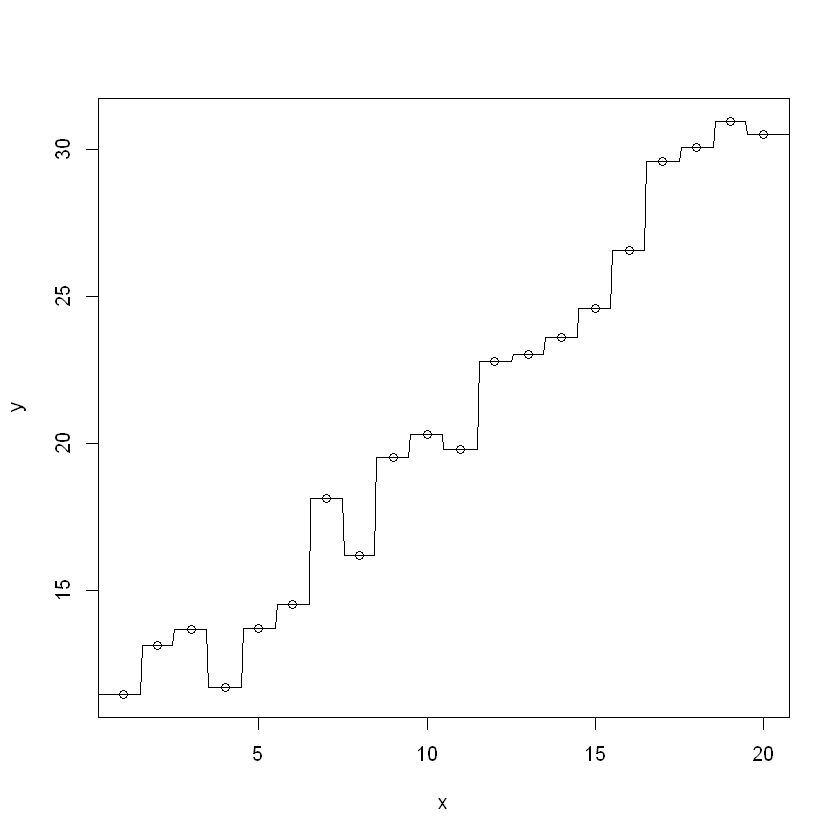

In [4]:
xgrid <- data.frame(x = seq(0, 21, 0.05))
knnr_out_1 <- knn.reg(x, y = y, k = 1, test = xgrid)
plot(x, y)
lines(xgrid$x, knnr_out_1$pred)

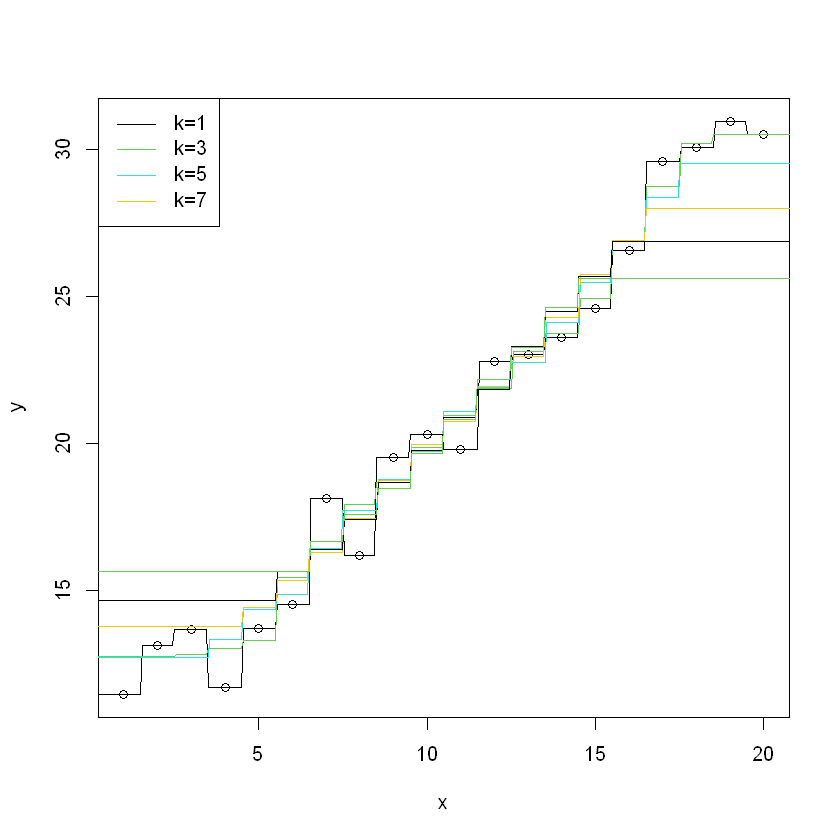

In [5]:
xgrid <- data.frame(x = seq(0, 21, 0.05))
plot(x, y)
k_seq <- seq(1, 7, 2)
for(i in seq(1, 11, 2)){
knnr_out_i <- knn.reg(x, y = y, k = i, test = xgrid)
lines(xgrid$x, knnr_out_i$pred, col = i)
}
legend("topleft", col = k_seq, legend = paste0("k=", k_seq), lty = 1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86837 -0.97191  0.00381  1.16548  1.76206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.20935    0.56763   16.22 3.44e-12 ***
x            1.09424    0.04739   23.09 7.94e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.222 on 18 degrees of freedom
Multiple R-squared:  0.9673,	Adjusted R-squared:  0.9655 
F-statistic: 533.3 on 1 and 18 DF,  p-value: 7.942e-15


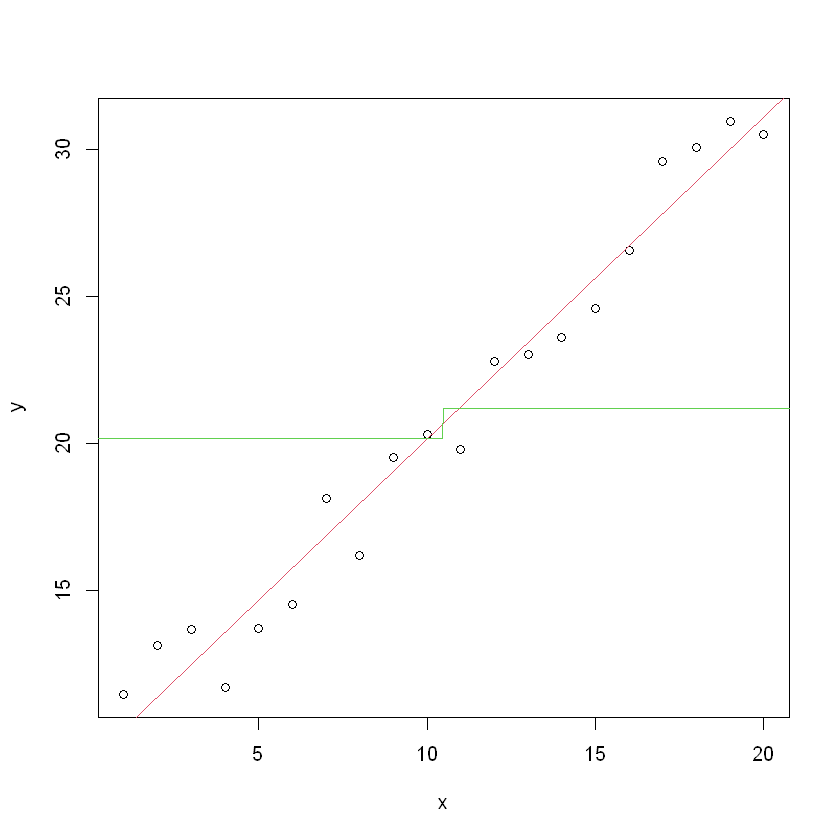

In [6]:
lm_out <- lm(y ~ x)
summary(lm_out)
plot(x, y)
abline(lm_out, col = 2)
knnr_out_19 <- knn.reg(x, test = xgrid, y = y, k = 19)
lines(xgrid[, 1], knnr_out_19$pred, col = 3)

2.2 K-Nearest neighbours with multiple explanatory variables

In [7]:
fitdata <- as.data.frame(
    matrix(c(1, 87, 42,
        6, 73, 43,
        7, 66, 44,
        15, 62, 54,
        12, 68, 45,
        4, 92, 46,
        12, 60, 50,
        13, 70, 46,
        14, 71, 54,
        10, 64, 47),
    byrow = TRUE, ncol = 3)
)
names(fitdata) <- c("fitness", "weight", "lungvol")
summary(fitdata)

    fitness          weight        lungvol     
 Min.   : 1.00   Min.   :60.0   Min.   :42.00  
 1st Qu.: 6.25   1st Qu.:64.5   1st Qu.:44.25  
 Median :11.00   Median :69.0   Median :46.00  
 Mean   : 9.40   Mean   :71.3   Mean   :47.10  
 3rd Qu.:12.75   3rd Qu.:72.5   3rd Qu.:49.25  
 Max.   :15.00   Max.   :92.0   Max.   :54.00  

In [8]:
lm_fitness <- lm(fitness ~ weight + lungvol, data = fitdata)
summary(lm_fitness)


Call:
lm(formula = fitness ~ weight + lungvol, data = fitdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8049 -1.5608 -0.6082  0.3628  3.9461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.7860    13.1958  -0.135   0.8961  
weight       -0.2324     0.0816  -2.848   0.0248 *
lungvol       0.5893     0.2008   2.935   0.0219 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.279 on 7 degrees of freedom
Multiple R-squared:  0.8149,	Adjusted R-squared:  0.762 
F-statistic: 15.41 on 2 and 7 DF,  p-value: 0.002728


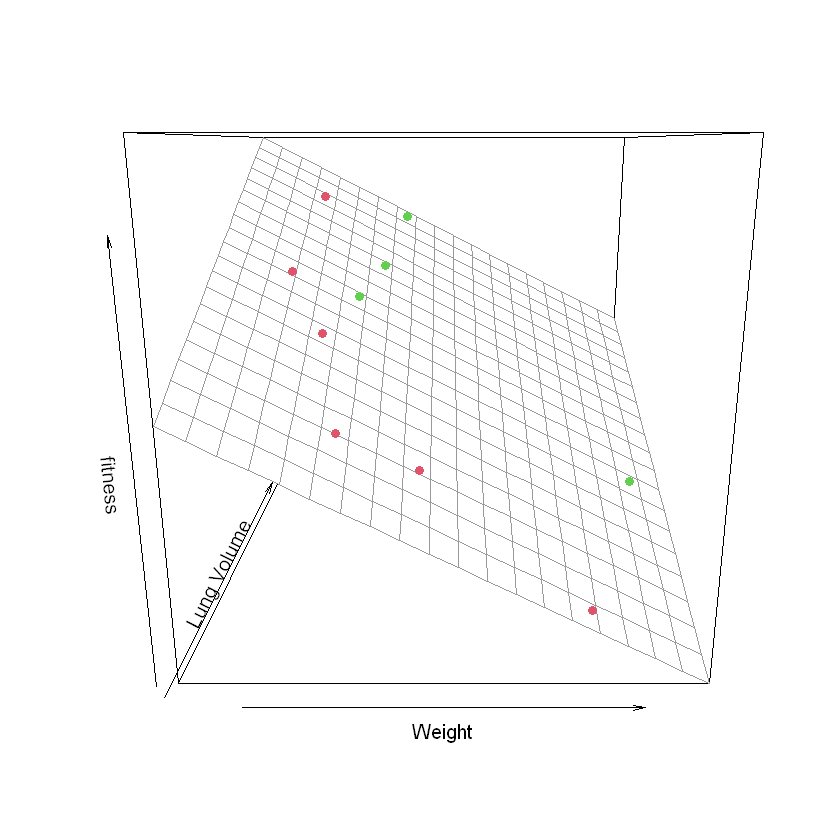

In [9]:
m1 <- seq(55, 95, length = 20)
m2 <- seq(40, 55, length = 20)
Xgrid <- expand.grid(weight = m1, lungvol = m2)
pred.grid <- predict(lm_fitness, newdata = Xgrid)
tt <- cbind(Xgrid, pred.grid)
res <- persp(m1, m2, matrix(pred.grid, nrow = length(m1)), border = grey(0.6),
    xlab = "Weight", ylab = "Lung Volume", zlab = "fitness",
    theta = 0, phi = 15)
points(trans3d(fitdata$weight, fitdata$lungvol, fitdata$fitness, pmat = res),
    pch = 16, col = (2:3)[1.5 + 0.5 * sign(lm_fitness$residuals)])

In [10]:
library(rgl)
with(tt, plot3d(lungvol, weight, pred.grid,
col = "grey80", size = 3, zlab = "fitness"))
with(fitdata, plot3d(lungvol, weight, fitness, add = TRUE, size = 2,
col = (2:3)[1.5 + 0.5 * sign(lm_fitness$residuals)],
type = "s"))


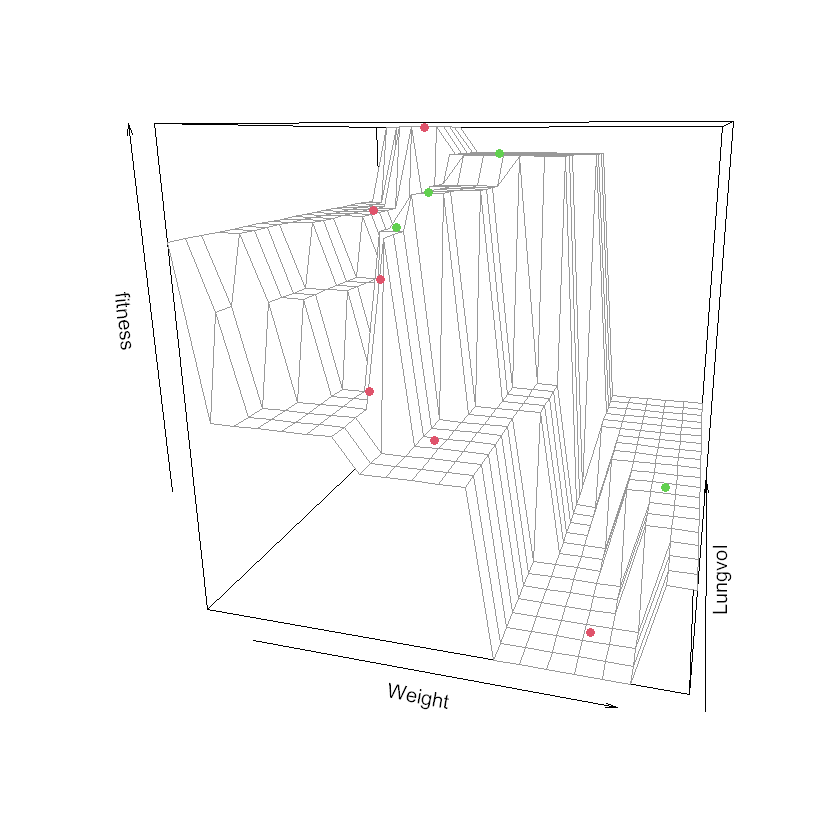

In [11]:
X <- fitdata[, c("weight", "lungvol")]
knnr_out_1 <- knn.reg(X, y = fitdata$fitness, k = 1, test = Xgrid)
res <- persp(m1, m2, matrix(knnr_out_1$pred, nrow = length(m1)),
border = grey(0.6),
xlab = "Weight", ylab = "Lungvol", zlab = "fitness",
theta = 15, phi = 15)
points(trans3d(fitdata$weight, fitdata$lungvol, fitdata$fitness, pmat = res),
pch = 16, col = c(2:3)[1.5 + 0.5 * sign(lm_fitness$residuals)])
with(tt, plot3d(lungvol, weight, knnr_out_1$pred,
col = "grey80", size = 3, zlab = "fitness"))
with(fitdata, plot3d(lungvol, weight, fitness, add = TRUE,
size = 2, col = "red", type = "s"))

3 Mean Squared Error and cross validation

3.1 Sneak preview

In [12]:
xgrid <- data.frame(x)
knnr_out_a_1 <- knn.reg(x, y = y, k = 1) # what is the default value for test?
knnr_out_b_1 <- knn.reg(x, test = xgrid, y = y, k = 1)
round(cbind(x, y,
pred_wo_test = knnr_out_a_1$pred,
pred_with_test = knnr_out_b_1$pred), 2)

x,y,pred_wo_test,pred_with_test
1,11.48,13.14,11.48
2,13.14,11.48,13.14
3,13.70,13.14,13.70
4,11.72,13.73,11.72
5,13.73,11.72,13.73
6,14.54,18.14,14.54
7,18.14,16.19,18.14
8,16.19,18.14,16.19
9,19.53,20.30,19.53
10,20.30,19.53,20.30


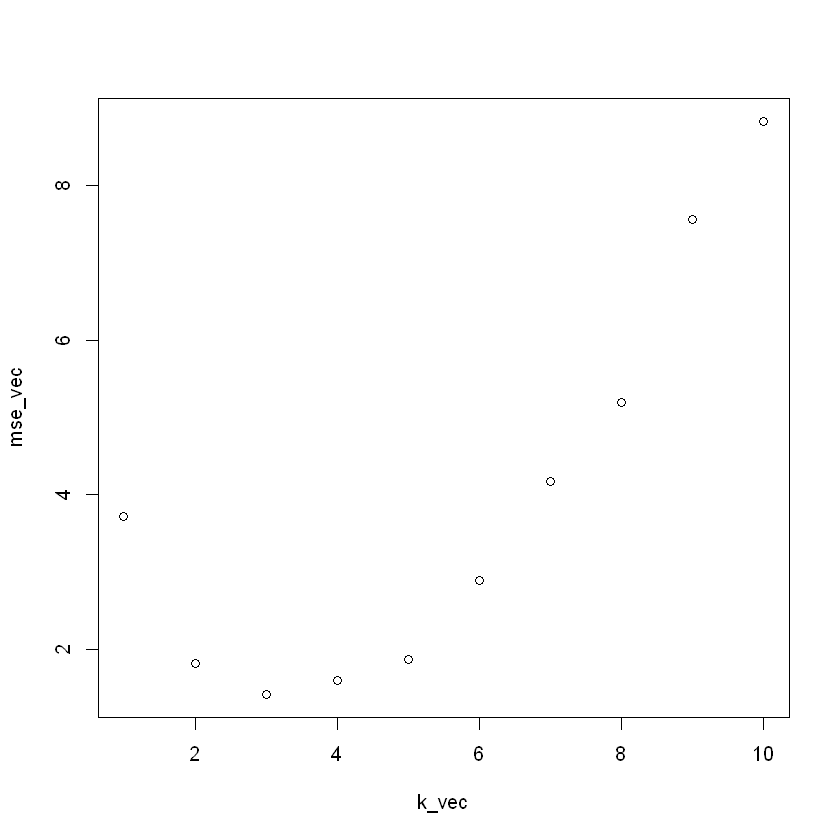

In [14]:
k_vec <- 1:10
mse_vec <- rep(NA, length(k_vec))
for(k in k_vec){
knnr_out_k <- knn.reg(x, y = y, k = k) # important: test = NULL for CV
mse_vec[k] <- mean((y - knnr_out_k$pred)^2)
}
plot(k_vec, mse_vec)


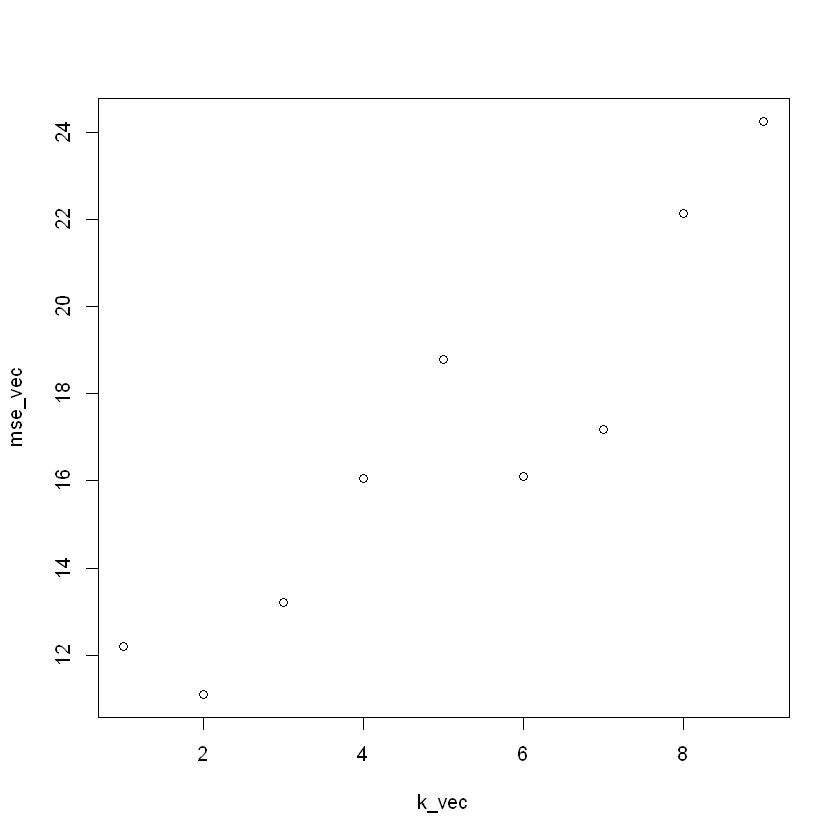

In [17]:
k_vec <- 1:(nrow(fitdata) - 1) # for CV there is a maximum on n-1 neighbours
mse_vec <- rep(NA, length(k_vec))
for(k in k_vec){
knnr_out_k <- knn.reg(X, y = fitdata$fitness, k = k)
mse_vec[k] <- mean((fitdata$fitness - knnr_out_k$pred)^2)
}
plot(k_vec, mse_vec)


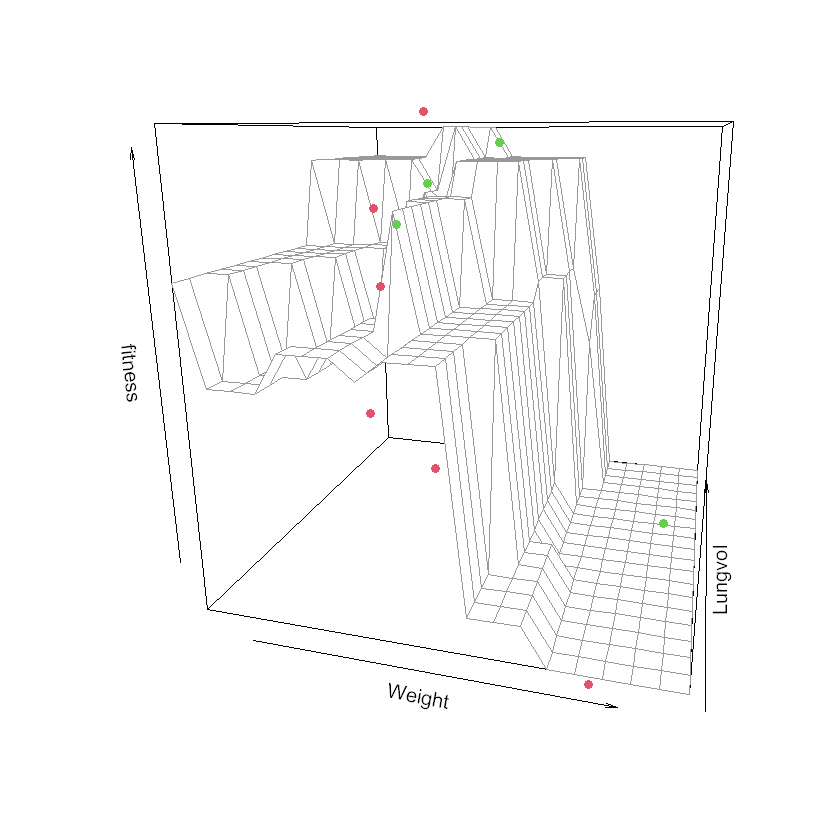

In [18]:
knnr_out_2 <- knn.reg(X, y = fitdata$fitness, k = 2, test = Xgrid)
res <- persp(m1, m2, matrix(knnr_out_2$pred, nrow = length(m1)),
border = grey(0.6),
xlab = "Weight", ylab = "Lungvol", zlab = "fitness",
theta = 15, phi = 15)
points(trans3d(fitdata$weight, fitdata$lungvol, fitdata$fitness, pmat = res),
pch = 16, col = c(2:3)[1.5 + 0.5 * sign(lm_fitness$residuals)])
with(tt, plot3d(lungvol, weight, knnr_out_2$pred,
col = "grey80", size = 3, zlab = "fitness"))
with(fitdata, plot3d(lungvol, weight, fitness, add = TRUE,
size = 2, col = "red", type = "s"))

4 Written exercise


To estimate the value of \( y \) at the point \( \mathbf{x}' = (10, 5) \) using KNN regression with \( k = 2 \) and \( k = 4 \), we follow these steps:

1. **Calculate the Euclidean distance between \( \mathbf{x}' \) and each point in the dataset.**
2. **Sort the points by their distance to \( \mathbf{x}' \).**
3. **Select the \( k \) nearest neighbors.**
4. **Compute the average \( y \) value of these neighbors.**

### Step 1: Calculate Euclidean Distances
The Euclidean distance between two points \((x_1, x_2)\) and \((x_1', x_2')\) is given by:
\[ d = \sqrt{(x_1 - x_1')^2 + (x_2 - x_2')^2} \]

For \( \mathbf{x}' = (10, 5) \):

\[
\begin{aligned}
&\text{Distance to } (3, 7): &\sqrt{(10 - 3)^2 + (5 - 7)^2} = \sqrt{49 + 4} = \sqrt{53} \approx 7.28 \\
&\text{Distance to } (4, 3): &\sqrt{(10 - 4)^2 + (5 - 3)^2} = \sqrt{36 + 4} = \sqrt{40} \approx 6.32 \\
&\text{Distance to } (7, 9): &\sqrt{(10 - 7)^2 + (5 - 9)^2} = \sqrt{9 + 16} = \sqrt{25} = 5 \\
&\text{Distance to } (8, 6): &\sqrt{(10 - 8)^2 + (5 - 6)^2} = \sqrt{4 + 1} = \sqrt{5} \approx 2.24 \\
&\text{Distance to } (9, 4): &\sqrt{(10 - 9)^2 + (5 - 4)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41 \\
&\text{Distance to } (11, 12): &\sqrt{(10 - 11)^2 + (5 - 12)^2} = \sqrt{1 + 49} = \sqrt{50} \approx 7.07 \\
&\text{Distance to } (13, 5): &\sqrt{(10 - 13)^2 + (5 - 5)^2} = \sqrt{9 + 0} = 3 \\
&\text{Distance to } (13, 8): &\sqrt{(10 - 13)^2 + (5 - 8)^2} = \sqrt{9 + 9} = \sqrt{18} \approx 4.24 \\
\end{aligned}
\]

### Step 2: Sort by Distance
\[
\begin{aligned}
(9, 4) &\approx 1.41 &y = 8 \\
(8, 6) &\approx 2.24 &y = 10 \\
(13, 5) &\approx 3 &y = 0 \\
(13, 8) &\approx 4.24 &y = 1 \\
(7, 9) &\approx 5 &y = 9 \\
(11, 12) &\approx 7.07 &y = 3 \\
(4, 3) &\approx 6.32 &y = 4 \\
(3, 7) &\approx 7.28 &y = 1 \\
\end{aligned}
\]

### Step 3: Select the \( k \) Nearest Neighbors
For \( k = 2 \):
\[
\begin{aligned}
(9, 4) &\approx 1.41 &y = 8 \\
(8, 6) &\approx 2.24 &y = 10 \\
\end{aligned}
\]
For \( k = 4 \):
\[
\begin{aligned}
(9, 4) &\approx 1.41 &y = 8 \\
(8, 6) &\approx 2.24 &y = 10 \\
(13, 5) &\approx 3 &y = 0 \\
(13, 8) &\approx 4.24 &y = 1 \\
\end{aligned}
\]

### Step 4: Compute the Average \( y \) Value
For \( k = 2 \):
\[
\text{Average } y = \frac{8 + 10}{2} = 9
\]

For \( k = 4 \):
\[
\text{Average } y = \frac{8 + 10 + 0 + 1}{4} = \frac{19}{4} = 4.75
\]

### Results
- **KNN regression estimate for \( \mathbf{x}' = (10, 5) \) with \( k = 2 \): 9**
- **KNN regression estimate for \( \mathbf{x}' = (10, 5) \) with \( k = 4 \): 4.75**